<a href="https://colab.research.google.com/github/Nestert/Practical-DeepLearning/blob/main/1_note.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install tensorflow
!pip install tensorflow-gpu
!pip install tf-explain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorflow_estimator-2.8.0-py2.py3-none-any.whl (462 kB)
  Using cached tensorboard-2.8.0-py3-none-any.whl (5.8 MB)
  Using cached keras-2.8.0-py2.py3-none-any.whl (1.4 MB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorflow_estimator-2.9.0-py2.py3-none-any.whl (438 kB)
  Using cached keras-2.9.0-py2.py3-none-any.whl (1.6 MB)
  Using cached tensorboard-2.9.1-py3-none-any.whl (5.8 MB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

from tf_explain.core.grad_cam import GradCAM
from tf_explain.core.occlusion_sensitivity import OcclusionSensitivity
from tf_explain.core.activations import ExtractActivations


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

In [2]:
def download_sample_image(filename):
    import requests
    url = f'https://raw.githubusercontent.com/PracticalDL/Practical-Deep-Learning-Book/master/sample-images/{filename}'
    open(filename, 'wb').write(requests.get(url).content)

In [3]:
IMAGE_PATHS = ['dog.jpg', 'cat.jpg']
for each_filename in IMAGE_PATHS:
    download_sample_image(each_filename)

In [4]:
def display_images(paths):
  # figure size in inches optional
  rcParams['figure.figsize'] = 11 ,8
  
  # read images
  img_A = mpimg.imread(paths[0])
  img_B = mpimg.imread(paths[-1])
  
  # display images
  fig, ax = plt.subplots(1,2)
  ax[0].imshow(img_A);
  ax[1].imshow(img_B);

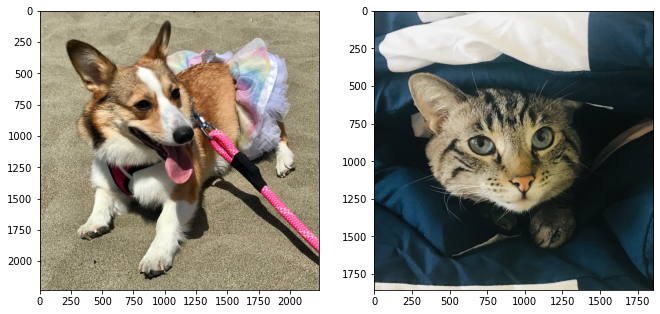

In [5]:
display_images(IMAGE_PATHS)  

In [6]:
model = tf.keras.applications.resnet50.ResNet50()

In [7]:
def predict(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    model = tf.keras.applications.resnet50.ResNet50()
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    img_preprocessed = preprocess_input(img_batch)
    prediction = model.predict(img_preprocessed)
    print(decode_predictions(prediction, top=3)[0])

In [8]:
predict(IMAGE_PATHS[0])
predict(IMAGE_PATHS[1])

UnimplementedError: ignored

In [ ]:
indices = [263, 281]

layers_name = ['activation_6']

from IPython.display import Image

for i in range(len(IMAGE_PATHS)):
    each_path = IMAGE_PATHS[i]
    index = indices[i]

    img = tf.keras.preprocessing.image.load_img(each_path,
                                                target_size=(224, 224))
    img = tf.keras.preprocessing.image.img_to_array(img)
    data = ([img], None)
    # Define name with which to save the result as
    name = each_path.split("/")[-1].split(".jpg")[0]

    #Save the Grad Cam visualization
    explainer = GradCAM()
    model = tf.keras.applications.vgg16.VGG16(weights='imagenet',
                                              include_top=True)
    grid = explainer.explain(data, model, 'block5_conv3', index)
    explainer.save(grid, '.', name + 'grad_cam.png')
    display_images([each_path, name + 'grad_cam.png'])